In [2]:
# 1. Load your csv file.

mydir <- "C:/Users/Fabia/ProgrammingFall2016/Week8/data/"
data <- read.csv(paste(mydir, "raw_returns.csv", sep=""),
                 row.names=1)
head(data)
dim(data)

,SPY,GDX,VXX,EEM,TVIX,XLF,EWJ,XIV,IWM,EFA,DUST,USO,QQQ,FXI,EWZ,VWO,GDXJ,XOP,HYG
2000-08-08,0.008050847,NA,NA,NA,NA,0,0.004608295,NA,-0.001838235,NA,NA,NA,0.02240326,NA,0,NA,NA,NA,NA
2000-08-09,-0.008406894,NA,NA,NA,NA,-0.006749156,0.009174312,NA,-0.007213093,NA,NA,NA,-0.02656042,NA,0,NA,NA,NA,NA
2000-08-10,-0.004875259,NA,NA,NA,NA,-0.005662514,-0.004545455,NA,-0.005719507,NA,NA,NA,-0.01978172,NA,-0.03184713,NA,NA,NA,NA
2000-08-11,0.004685837,NA,NA,NA,NA,0.01537607,0.01369863,NA,0.01741294,NA,NA,NA,0.01391788,NA,0.02302632,NA,NA,NA,NA
2000-08-14,0.01271995,NA,NA,NA,NA,0.01289939,-0.004504505,NA,0.0103912,NA,NA,NA,0.0212766,NA,0,NA,NA,NA,NA
2000-08-15,-0.0008373459,NA,NA,NA,NA,-0.01827264,0.009049774,NA,-0.01451906,NA,NA,NA,0,NA,0.02893891,NA,NA,NA,NA


[1] 4025   19


Call:
lm(formula = data$EWJ ~ data$IWM)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.068305 -0.006291  0.000077  0.006292  0.241635 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.429e-05  1.879e-04  -0.129    0.897    
data$IWM     4.998e-01  1.091e-02  45.800   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01192 on 4023 degrees of freedom
Multiple R-squared:  0.3427,	Adjusted R-squared:  0.3426 
F-statistic:  2098 on 1 and 4023 DF,  p-value: < 2.2e-16



Call:
lm(formula = data$EWJ ~ data$IWM + data$QQQ)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.067658 -0.006243 -0.000073  0.006199  0.128716 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.296e-05  1.777e-04  -0.242    0.809    
data$IWM     2.758e-01  1.455e-02  18.948   <2e-16 ***
data$QQQ     3.178e-01  1.456e-02  21.831   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01127 on 4022 degrees of freedom
Multiple R-squared:  0.4124,	Adjusted R-squared:  0.4121 
F-statistic:  1411 on 2 and 4022 DF,  p-value: < 2.2e-16


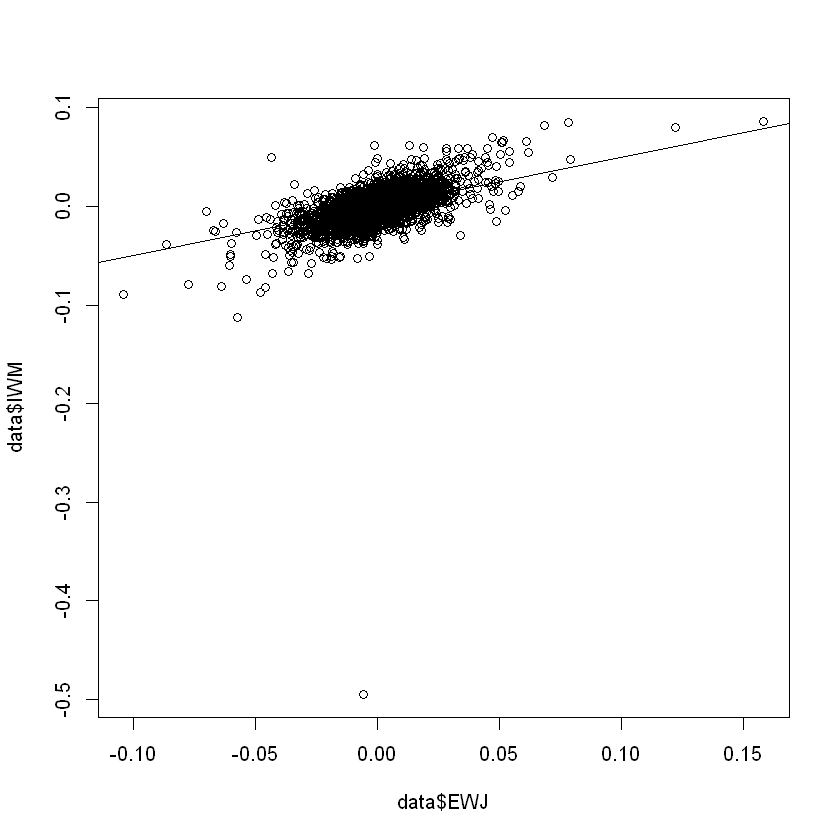

In [9]:
# 2. Choose several columns which you would like to use 
# in a linear model. This could be multivariate or several 
# univariate models.
model_1 <- lm(data$EWJ ~ data$IWM)
model_2 <- lm(data$EWJ ~ data$IWM + data$QQQ)

summary(model_1)
summary(model_2)

plot(data$EWJ, data$IWM)
abline(model_1)


In [19]:
x <- c(1,2,5,2,4,2,1,5)
y <- trunc(x,3)
y

# 

[1] 1 2 5 2 4 2 1 5

In [24]:
# 3. Split your dataset into a 'training' and 'testing' dataset. 
# That is, you will fit your models only on the training set and try 
# to predict the other. This is usually 90:10 testing:training.

# The current dataset contains 4025 lines. This means that the first 0.9*4025 
# observations are going to be testing, 0.1*4025 are going to be training.

# Index all observations from 1:4025
index <- 1:nrow(data)

# create a vector which samples the over 10% of the 
# indexnumbers (1 x 4025*0.1)
trainindex <- sample(index, trunc(length(index)*0.1))
# (However, I dont really get what the trunc function does)


# create a dataframe which uses the observations according to the 
# sampled indexnumbers
trainset <- data[trainindex, ]

# create a datafram which uses observations according to all numbers which 
# are not contained in the indexvector 
testset <- data[-trainindex, ]

dim(testset)
dim(trainset)


# credits to http://www.gettinggeneticsdone.com/2011/02/split-data-frame-into-testing-and.html

[1] 3623   19

[1] 402  19

In [62]:
# 4. Estimate your linear model over only the training dataset.

model_training <- lm(trainset$EWJ ~ trainset$IWM)
summary(model_training)




Call:
lm(formula = trainset$EWJ ~ trainset$IWM)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.049683 -0.006053  0.000071  0.006007  0.052369 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.0006046  0.0005345  -1.131    0.259    
trainset$IWM  0.5993678  0.0342125  17.519   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01068 on 400 degrees of freedom
Multiple R-squared:  0.4342,	Adjusted R-squared:  0.4327 
F-statistic: 306.9 on 1 and 400 DF,  p-value: < 2.2e-16


In [63]:
# 5. Using the results from your estimation, try to predict the 
# outcomes in the testing dataset.


predictions <- predict(model_training, testset)
predictions

Warning message:
: 'newdata' had 3623 rows but variables found have 402 rows

1             2             3             4             5 
 3.515657e-03 -4.997321e-03 -7.693889e-03 -9.682232e-04  6.522569e-03 
            6             7             8             9            10 
 1.834064e-03 -1.018378e-03  5.698289e-03 -9.128560e-03 -9.233860e-03 
           11            12            13            14            15 
 6.421876e-03 -8.096135e-04  1.322700e-02 -9.172383e-03 -1.399065e-02 
           16            17            18            19            20 
-2.420793e-03  1.307035e-03  7.127972e-03 -4.668049e-03 -7.164853e-04 
           21            22            23            24            25 
-2.896799e-03  1.557649e-03 -3.210088e-03 -1.036847e-02 -9.322923e-03 
           26            27            28            29            30 
 9.668210e-04  5.364121e-03 -3.307646e-03 -5.555200e-03  2.306222e-02 
           31            32            33            34            35 
-3.785883e-03  2.030832e-02  6.816528e-04 -6.835650e-03 -1.419395e-03 
           36            37            38            39            40 
-2.354227e-03 -4.277345e-03 -4.095191e-03  8.629990e-03  6.444246e-03 
           41            42            43            44            45 
-3.371574e-03  3.155795e-03  1.035686e-03 -4.691738e-03 -2.383751e-03 
           46            47            48            49            50 
-7.368003e-03 -1.504293e-03  9.693718e-04  4.047842e-03 -4.229093e-03 
           51            52            53            54            55 
 3.838417e-03  1.013314e-04 -1.941334e-03  3.238699e-03 -7.026521e-04 
           56            57            58            59            60 
 5.012100e-03  3.576490e-03 -7.707495e-03 -1.343039e-02 -4.119853e-03 
           61            62            63            64            65 
 5.853107e-03 -7.294260e-03 -2.351699e-03  1.286345e-02  7.163683e-03 
           66            67            68            69            70 
 6.423842e-03  3.158580e-03 -1.019696e-02  3.592410e-03  1.575628e-03 
           71            72            73            74            75 
 9.156093e-03  4.892142e-03  1.153398e-02  1.478476e-03 -6.554137e-03 
           76            77            78            79            80 
-1.384650e-03  1.246368e-02  6.981084e-03  4.927425e-03  5.151799e-03 
           81            82            83            84            85 
-2.830980e-03 -4.453049e-03  9.027871e-03  9.470496e-03  3.271295e-03 
           86            87            88            89            90 
-8.688198e-03  3.253775e-03  7.780733e-04 -4.244170e-03 -1.650279e-03 
           91            92            93            94            95 
 3.926051e-03 -1.571656e-02  6.398274e-04 -6.269182e-03  3.828289e-03 
           96            97            98            99           100 
 6.759951e-03 -5.483091e-04 -1.115587e-02  4.671236e-03 -1.880292e-02 
          101           102           103           104           105 
 8.856719e-04  3.118238e-03 -1.302444e-02  3.221834e-02 -5.259998e-03 
          106           107           108           109           110 
-2.279002e-02  1.175940e-03 -6.411517e-03  1.472244e-02  9.506164e-03 
          111           112           113           114           115 
-8.462022e-03  5.272086e-03 -1.209821e-02  1.140309e-02 -5.372605e-03 
          116           117           118           119           120 
 1.177109e-03 -2.994304e-02  4.985170e-03 -5.975231e-03 -2.127800e-03 
          121           122           123           124           125 
 3.952817e-03  5.315601e-03  7.746408e-03  6.958455e-03  9.461456e-03 
          126           127           128           129           130 
-4.055430e-03  2.101969e-03 -4.190563e-03  7.226055e-03  2.738668e-03 
          131           132           133           134           135 
 5.276057e-03  9.420725e-03  3.449231e-02  6.816591e-03 -4.513123e-03 
          136           137           138           139           140 
 1.137787e-03  1.057056e-03  5.488598e-03 -3.340599e-03 -2.155590e-03 
          141           142         

[1] 0.0001135525

1             2             3             4             5 
-1.183167e-02 -1.670927e-02  3.251658e-02  6.321542e-03 -2.273277e-03 
            6             7             8             9            10 
 8.158798e-03 -1.228766e-02 -1.412526e-02  3.566303e-04 -6.230058e-03 
           11            12            13            14            15 
 1.368781e-02 -1.954317e-02 -9.568464e-03  1.007005e-02  4.036891e-04 
           16            17            18            19            20 
-5.889456e-03 -5.512249e-03 -1.291397e-03 -2.878062e-02 -1.018864e-02 
           21            22            23            24            25 
 5.302573e-03  3.050645e-03 -4.802733e-03 -3.250208e-03 -7.223840e-03 
           26            27            28            29            30 
-9.427058e-03 -1.541491e-03  3.307646e-03 -2.412928e-03 -1.368271e-02 
           31            32            33            34            35 
 2.237895e-03 -1.280836e-03  3.728491e-03  1.160513e-02  2.174112e-03 
           36            37            38            39            40 
-5.775854e-03  4.073763e-04  9.539837e-03 -6.643893e-03 -9.243406e-03 
           41            42            43            44            45 
 9.085860e-03  6.089197e-03 -4.186947e-03  3.892378e-03  6.975119e-03 
           46            47            48            49            50 
 7.368003e-03 -6.649044e-04 -1.734790e-02 -1.643472e-04 -1.867927e-02 
           51            52            53            54            55 
 9.569404e-03  7.047199e-03 -7.343717e-03  2.352529e-02  2.612872e-03 
           56            57            58            59            60 
 1.188336e-02 -2.660739e-03  1.489435e-02  5.978826e-03 -1.904309e-02 
           61            62            63            64            65 
-4.260750e-03  6.298244e-03  6.296472e-03 -9.976057e-03 -8.202105e-03 
           66            67            68            69            70 
-6.423842e-03 -4.206798e-03  3.431061e-03 -2.494472e-02 -6.100515e-03 
           71            72            73            74            75 
-2.592961e-04 -2.342626e-02  1.605718e-03 -2.257899e-03  2.930948e-03 
           76            77            78            79            80 
 3.062503e-03 -9.351650e-03 -9.007426e-03 -5.934475e-03 -7.062018e-03 
           81            82            83            84            85 
 4.279206e-03 -2.515592e-03 -1.996347e-02 -1.939115e-03 -7.455395e-03 
           86            87            88            89            90 
 5.597008e-03 -7.498257e-03 -3.778073e-03 -1.001608e-02 -2.410634e-03 
           91            92            93            94            95 
 3.714017e-03  6.337049e-03 -1.338770e-02  6.966046e-03  1.009836e-04 
           96            97            98            99           100 
-9.259951e-03  3.909654e-03  4.843880e-03 -5.517976e-03  1.464492e-02 
          101           102           103           104           105 
-1.421901e-02  1.581010e-03 -1.329135e-02  2.932012e-02  8.287244e-03 
          106           107           108           109           110 
 5.659403e-03  9.350375e-03 -5.481446e-03 -6.704944e-03 -6.107694e-03 
          111           112           113           114           115 
-1.040590e-02 -2.178505e-03 -1.354709e-03 -1.870236e-02 -7.167044e-04 
          116           117           118           119           120 
-4.402916e-03 -1.605696e-02  5.995222e-03 -3.896437e-03 -5.589951e-03 
          121           122           123           124           125 
-1.969486e-04 -1.283343e-03 -2.024641e-02  3.095138e-02 -3.064868e-03 
          126           127           128           129           130 
 3.076956e-03 -7.217059e-03 -1.119171e-03 -3.529197e-03  1.576761e-02 
          131           132           133           134           135 
 3.860156e-03 -1.007263e-03  2.182505e-03  1.684182e-03 -4.823945e-03 
          136           137           138           139           140 
 2.472321e-03 -4.511288e-03  8.859045e-04 -2.746357e-03  6.492104e-03 
          141           142         

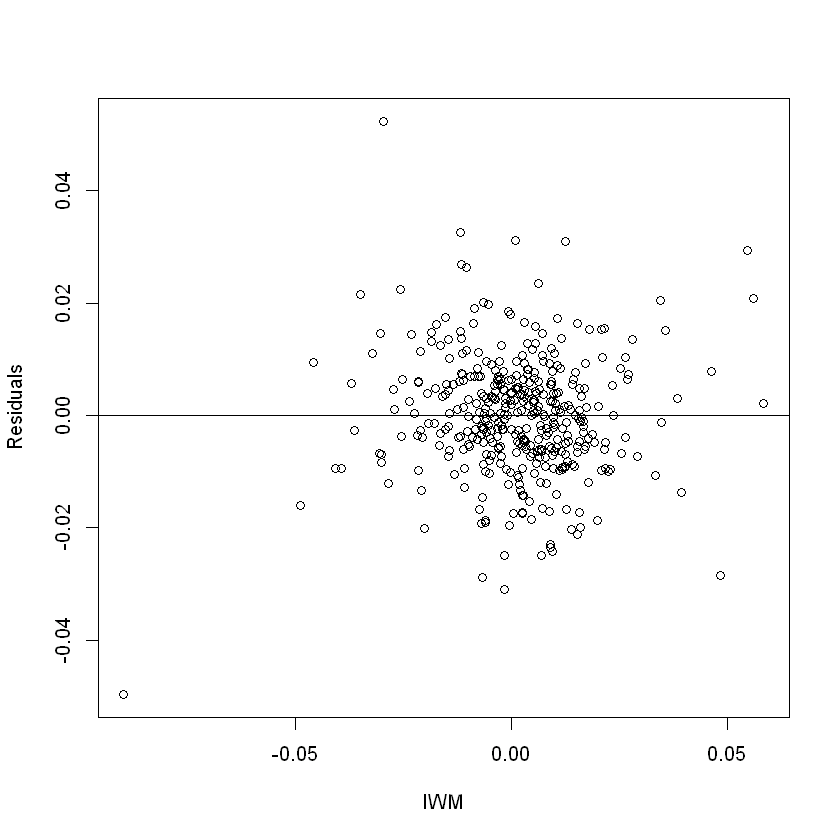

In [65]:
# 6. Calculate the mean squared error of your estimate. Plot the 
# residuals. Do any other error analysis you might see as interesting.

# MSE = 1/n sum_(Y_hat - Y)^2,
# whereby Y_hat is the prediction under "predict"
# and Y is the observations in trainset$EWJ

MSE <- 1/402*sum((predictions-trainset$EWJ)^2)
MSE

# The residuals are calculated by r_i = X_i - X_bar; or easier with
# a predefined function

model_training.res = resid(model_training) 
model_training.res

# Residual plot
plot(trainset$IWM, model_training.res, 
     ylab="Residuals", xlab="IWM") 
 abline(0, 0) 

# 